# Analysis of Oil prices (Crude-Oil-Prices-West-Texas-Intermediate-WTI-Cushing-Oklahoma)

This notebook shows an analysis of oil prices over the years 2009 to 2019.
We will analyse these prices and try to find patterns from it. 

We will first preprocess the dataset to match our needs, then create a function to which we can pass a percent change in price and it will give us, all the dates where similar percent change was occured.

In [1]:
# Packages for analysing the dataset
from warnings import filterwarnings
filterwarnings('ignore')
from datetime import datetime, timedelta, date
from seaborn import set_style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
set_style('darkgrid')

## 1. Preprocessing

First we will load the dataset in a pandas dataframe, to perform the preprocessing on it. 

As we are a little aware of our dataset, we will make the `DATE` column as out index column.

In [2]:
df = pd.read_csv('DCOILWTICO.csv', index_col=[0])
df.tail()

,DCOILWTICO
DATE,
2019-11-11,56.61
2019-11-12,56.67
2019-11-13,57.5
2019-11-15,57.5
2019-11-16,57.9


Now that we have loaded the dataframe, let's convert the `DATE` column to datetime format, so that it'll be easier for use to analyse it further.

In [3]:
df.index = pd.to_datetime(df.index)
df.head(15).T

DATE,2009-11-12,2009-11-13,2009-11-16,2009-11-17,2009-11-18,2009-11-19,2009-11-20,2009-11-23,2009-11-24,2009-11-25,2009-11-26,2009-11-27,2009-11-30,2009-12-01,2009-12-02
DCOILWTICO,77.25,76.34,78.91,79.08,79.55,77.47,76.83,76.49,74.88,77.25,.,75.95,77.19,78.39,76.62


In [4]:
df.dtypes

DCOILWTICO    object
dtype: object

By looking at first 15 rows, we can see there is a value `.` which needs to be removed from the prices column, and convert the prices to `float` data type.

In [5]:
df['DCOILWTICO'] = df['DCOILWTICO'][df['DCOILWTICO'] != '.'].astype('float32')

Now, we'll check for `NaN` values and drop them from the dataframe

In [6]:
df.isna().sum()

DCOILWTICO    94
dtype: int64

In [7]:
df.dropna(inplace=True)

As the dataset is pretty much cleaned, let's plot it to see the variations in prices over the years.

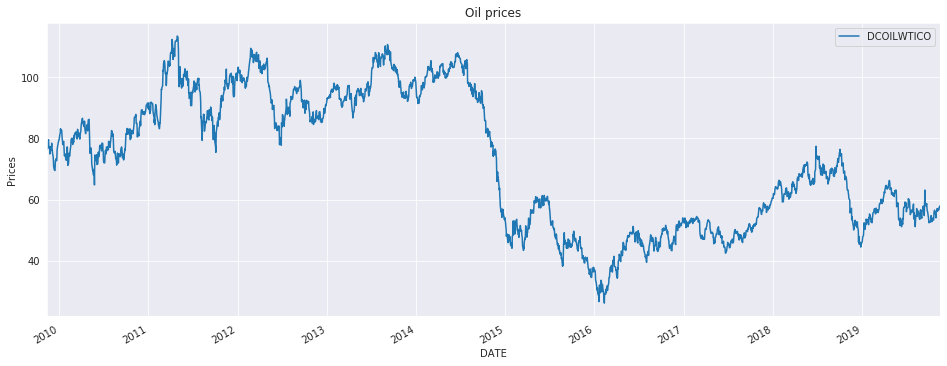

In [8]:
df.plot(figsize=(16,6))
plt.title('Oil prices')
plt.ylabel('Prices')
plt.show()

As per the requirements, we need to find the difference between consecuative price values and their percent change, let's add these values as new columns called, `Difference` and `Perc_diff`

## 2. Feature generation

In [9]:
df['Difference'] = df['DCOILWTICO'].diff(periods=1)
df['Perc_diff'] = df['DCOILWTICO'].pct_change(periods=1) * 100
df.fillna(0, inplace=True)
df.head()

,DCOILWTICO,Difference,Perc_diff
DATE,,,
2009-11-12,77.250000,0.000000,0.000000
2009-11-13,76.339996,-0.910004,-1.177996
2009-11-16,78.910004,2.570007,3.366530
2009-11-17,79.080002,0.169998,0.215435
2009-11-18,79.550003,0.470001,0.594342


Now, we have got the required difference and precent change values, let's extract few other features from the dataset, so that it'll be easier for us to get the range of similar percent change values. 

We'll add more columns for `Daily`, `Weekly`, `Monthly`, `Yearly`, and so on.

In [10]:
df['Day'] = pd.to_datetime(df.index).day
df['Month'] = pd.to_datetime(df.index).month
df['Weekday'] = pd.to_datetime(df.index).dayofweek
df['Year'] = pd.to_datetime(df.index).year
df.head()

,DCOILWTICO,Difference,Perc_diff,Day,Month,Weekday,Year
DATE,,,,,,,
2009-11-12,77.250000,0.000000,0.000000,12,11,3,2009
2009-11-13,76.339996,-0.910004,-1.177996,13,11,4,2009
2009-11-16,78.910004,2.570007,3.366530,16,11,0,2009
2009-11-17,79.080002,0.169998,0.215435,17,11,1,2009
2009-11-18,79.550003,0.470001,0.594342,18,11,2,2009


As we can see the final dataframe above, now we can work on getting similar percent change values over a period of range

## 3. Analysis

First let's try to find all the dates where we specify a `Weekday`(Ranging from 0 to 4, where `0 is Monday`, `1 is Tuesday`, and so on) and `Perc_diff` over a period of time.

In [11]:
start_date = '2009-11-01'
end_date = '2019-11-18'
percent_change = 0.1
weekday = 0  # 0 to 4 (Monday to Friday)
df.loc[(df['Perc_diff'] > percent_change)
       & (df['Weekday'] == weekday)][start_date:end_date]

,DCOILWTICO,Difference,Perc_diff,Day,Month,Weekday,Year
DATE,,,,,,,
2009-11-16,78.910004,2.570007,3.366530,16,11,0,2009
2009-11-30,77.190002,1.240005,1.632655,30,11,0,2009
2009-12-28,78.669998,1.839996,2.394891,28,12,0,2009
2010-01-04,81.519997,2.129997,2.682960,4,1,0,2010
2010-01-25,74.900002,0.650002,0.875425,25,1,0,2010
...,...,...,...,...,...,...,...
2019-08-19,56.240002,1.410000,2.571583,19,8,0,2019
2019-09-09,57.880001,1.430000,2.533221,9,9,0,2019
2019-09-16,63.099998,8.340000,15.230095,16,9,0,2019


Now, let's try to print the values greater than a percent_change value we enter in a given dates range.

In [12]:
start_date = '2019-06-01'
end_date = '2020-01-01'
percent_change = 5
df.loc[(df['Perc_diff'] > percent_change)][start_date:end_date]

,DCOILWTICO,Difference,Perc_diff,Day,Month,Weekday,Year
DATE,,,,,,,
2019-06-20,56.880001,3.139999,5.842948,20,6,3,2019
2019-09-16,63.099998,8.340000,15.230095,16,9,0,2019


# Final functions

There are 3 functions below,    

1. `get_details`

2. `get_change`

3. `get20_change`

The `get_details` function takes the csv file and preprocesses it, and gives the dates on which the oil prices are changed w.r.t. given given percentage change value.

The `get_change` function then takes these dates and outputs the percentage change values on given period range.

The `get20_change` function gives percentage change values in the period of 3 days before and after 20th day of given month and year in the loopback range.

In [13]:
def get_details(csv_path, start_date, end_date, percent_change, weekday=0):
    """
    This function returns the dates where the oil prices have moved w.r.t given percent change value given as input.

    csv_path: String, path to the csv dataset file.
    (Note: The file should have only two columns named `DATE` and the symbol name 'DCOILWTICO')

    start_date: String, starting date for look back

    end_data: String, ending date for look back

    percent_change: float, the percent change value for look back

    weekday: int, default: 0 (Monday), It ranges through 0 to 4 (Monday to Friday)
    """
    # Preprocessing the data
    data = pd.read_csv(csv_path, index_col=[0])
    data.index = pd.to_datetime(data.index)
    data['DCOILWTICO'] = data['DCOILWTICO'][data['DCOILWTICO'] != '.'].astype(
        'float32')
    data.dropna(inplace=True)

    # Feature generation
    data['Difference'] = data['DCOILWTICO'].diff(periods=1)
    data['Perc_diff'] = data['DCOILWTICO'].pct_change(periods=1) * 100
    data.fillna(0, inplace=True)
    data['Day'] = pd.to_datetime(data.index).day
    data['Month'] = pd.to_datetime(data.index).month
    data['Weekday'] = pd.to_datetime(data.index).dayofweek
    data['Year'] = pd.to_datetime(data.index).year

    # Get results
    if weekday != 0:
        result = data[start_date:end_date]
        result = result[result['Perc_diff'] > int(percent_change)]
        result = result[result['Weekday'] == int(weekday)]
        result = list(result.index)
        
    else:
        result = data[start_date:end_date]
        result = result[result['Perc_diff'] > int(percent_change)]
        result = list(result.index)
        
    return [i.strftime('%Y-%m-%d') for i in result], data


def get_change(data, period, price, date):
    """
    This function outputs the percent changes in oil prices in a given period of dates.
    
    data: Dataframe, Preprocessed dataframe with percent_differences column.
    
    period: int, The number of days for which you want to see the changes in price.
    
    price: int or float, The percent change in price.
    
    date: string, Starting date for loopback range.
    """
    end_date = datetime.strptime(date, '%Y-%m-%d') + timedelta(days=period)
    value = data[date:str(end_date).split(' ')[0]].mean()
    value = round(value, 3)
    print(
        f'From {date} to {str(end_date).split(" ")[0]} when oil goes above {price}, the price changes by {value} %')


def get20_change(data, month, year):
    """
    This function outputs percent changes occur 3 days before and after 20th day of given month and year.
    
    data: Dataframe, Preprocessed data to get the prices
    
    month: int, Month in which you want to see the price change (0 to 12, Jan to Dec)
    
    year: int, Year in which you want to see the price change
    """
    # Preprocessing the data
    data = pd.read_csv(data, index_col=[0])
    data.index = pd.to_datetime(data.index)
    data['DCOILWTICO'] = data['DCOILWTICO'][data['DCOILWTICO']
                                            != '.'].astype('float32')
    data.dropna(inplace=True)

    # Feature generation
    data['Difference'] = data['DCOILWTICO'].diff(periods=1)
    data['Perc_diff'] = data['DCOILWTICO'].pct_change(periods=1) * 100
    data.fillna(0, inplace=True)

    data['Day'] = pd.to_datetime(data.index).day
    data['Month'] = pd.to_datetime(data.index).month
    data['Year'] = pd.to_datetime(data.index).year

    price_at_20 = data[data['Month'] == int(month)]
    price_at_20 = price_at_20[price_at_20['Year'] == int(year)]
    price_at_20 = price_at_20[price_at_20['Day'] > 16]
    price_at_20 = price_at_20[price_at_20['Day'] <= 24]
    print(f'\nPrice change 20th of {month} Month of {year}:\n')
    print(price_at_20)

In [14]:
csv_file = input('Enter csv filename/path for prices: ')
start_date = input('Enter the start date for loob back (YYYY-MM-DD): ')
end_date = input('Enter the end date for loop back (YYYY-MM-DD): ')
weekday = input('Enter the day on which you want to see the changes(0 to 4, Monday to Friday): ')
percent_change = int(input('Enter price change(O% to 100%): '))
print()
r, prep_data = get_details(csv_path=csv_file,
                start_date=start_date,
                end_date=end_date,
                percent_change=percent_change,
                weekday=weekday)

if len(r) == 0:
    print(f'\nPrice never changed above {percent_change} for given period and day\nExiting....')
else:
    print(f'\nFollowing are the dates where the price went above {percent_change}%, \n{r}\n')
    period = int(input('\nEnter the number of days for which you want to see the price change from above dates: '))
    for i in r:
        get_change(data=prep_data['Perc_diff'], price=percent_change, period=period, date=i)
        print()

    print(f'\nPrice change on 20th Day,\nFor the period of {start_date} to {end_date}')
    month = input('Enter the month to see changes on 20th day: ')
    year = input('Enter the year to see changes on 20th day: ')

    p = get20_change(data=csv_file, month=month, year=year)

Enter csv filename/path for prices: DCOILWTICO.csv
Enter the start date for loob back (YYYY-MM-DD): 2016-01-01
Enter the end date for loop back (YYYY-MM-DD): 2019-01-01
Enter the day on which you want to see the changes(0 to 4, Monday to Friday): 0
Enter price change(O% to 100%): 4


Following are the dates where the price went above 4%, 
['2016-02-22', '2016-03-07', '2018-12-03']


Enter the number of days for which you want to see the price change from above dates: 3
From 2016-02-22 to 2016-02-25 when oil goes above 4, the price changes by 1.573 %

From 2016-03-07 to 2016-03-10 when oil goes above 4, the price changes by 1.321 %

From 2018-12-03 to 2018-12-06 when oil goes above 4, the price changes by 0.401 %


Price change on 20th Day,
For the period of 2016-01-01 to 2019-01-01
Enter the month to see changes on 20th day: 12
Enter the year to see changes on 20th day: 2018

Price change 20th of 12 Month of 2018:

            DCOILWTICO  Difference  Perc_diff  Day  Month  Year
DATE   